<a href="https://colab.research.google.com/github/Fermionpass/IO/blob/main/Maquinas_de_soporte_vectorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máquinas de soporte vectorial

Las máquinas de soporte vectorial fueron propuestas y desarrolladas por Vapnik & Cortes (más otros colaboradores). Se trata de máquinas de aprendizaje que resultan útiles para resolver dos tipos de problemas: clasificación y regresión (puede haber más). *En principio las máquinas de soporte vectorial parten de la idea de mapear vectores de entrada pertenecientes a un espacio Z de características de dimensión mayor, siendo el mapeo no-lineal (no necesariamente lineal) y algunas propiedades especiales para una mayor generalización de las máquinas de soporte vectorial[1]. En este mismo espacio se construye una superficie de decisión lineal, con ciertas propiedades especiales para poder asegurar una alta generalización de las máquinas de soporte vectorial.*

Una de las ventajas de emplear una máquina de soporte de vectorial se sustenta en poder manejar de manera efectiva diferentes tipos de datos.

#Aunque el modelo presentaba dos tipos de problemas:
* Uno de tipo conceptual y corresponde con encontrar o construir un hiperplano, que conserve la generalización en el espacio de características de dimensión mayor, por ser enorme.
* El segundo problema es técnico computacionalmente hablando por los espacios de mayor dimensión, ya sea para construir polinomios de grado 4 o 5 en un espacio de dimensión 200 o bien construir un hiperplano  en un espacio de dimensión de mil millones de características.

El primero de los problemas fue resuelto por *Vapnik & Chervonenkis* en 1965, desarrollando la idea de hiperplano óptimo para clases de datos separables. El definió los hiperplanos como una función de decisión lineal con un margen máximo entre dos clases de vectores asociados y los cuales se ejemplifican en la imagen:

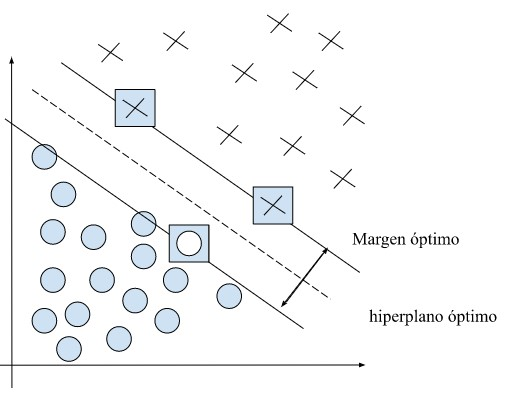



Boser, Guyon y Vapnik, introdujeron las máquinas de soporte vectorial, para resolver porblemas de clasificación supervisada en dimensiones mayores.

# Máquinas de soporte vectorial para clasificación de datos hiperespectrales
# Clasificación
Si conocemos un conjunto de ejemplos, el cual cuenta con pares de etiquetas de clase y vectores de características.
Dados un conjunto de pares de entrenamiento ($y_i$, $x_i$), *i* = 1..... *l*, que consta de etiquetas de clase, $y_i$ ∈ $ℜ^n$. Buscamos una función f( : α ): *x* -----> *y* , que representa el clasificador, *y*= f(*x*: α )en esta función se encuentran todods los parámetros  del clasificador.




In [ ]:
# Vamos a dar un ejemplo de un svm (support vector machine)
#Mandamos llamar a las librerias
from sklearn import svm
X =[[0,0],[1,1]] # Vectores de caracteristicas
y = [0,1]  # Etiquetas de clase
clf = svm.SVC()
clf.fit(X,y)

SVC()

Después de ser ajustado el modelo puede ser utilizado para predecir nuevos valores:


In [ ]:
clf.predict([[2.,2.]])


array([1])

La función de decisión  de SVMs, depende sobre algunos subconjuntos de datos de entrenamiento, llamado  vectores de soporte.Y se denominad de esta manera, si los $$x_i$$ se cumple que:

$$y_i(w⋅x_i+b)= 1 $$



# Método de margen óptimo

Vapnik y Cherovnenkis, originaron el método de margen óptimo para datos separables. El problema es colocoar un hiperplano de marea que:

* Todos los datos de la clase +1 se encuentren en un lado del hiperplano mientras que todos los datos de la clase -1 se encuentren del otro lado.

* El hiperlano se coloca de manera que la distancia de los vectores más cercanos en ambas clases al hiperplano, llamado margen, sea máxima.

Se define el hiperplano  por la ecuación: $$w⋅x+b=0$$ donde *x* es un punto en el hiperplano, w es el vector n dimensional perpendicular  al hiperplano y b es la distnacia del punto más cercano en el hiperplano al origen. Entonces podemos definir el clasificador como:


$$ f(x;w,b) = sgn(w⋅x+b)$$


 Ya que puede tratarse de un espacio de características de mil millones de dimensiones, podemos hacer algunas consideraciones del hiperplano óptimo en el espacio de características:
  
* Los pesos $w_0$ del hiperplano óptimo se puede expresar como una combinación lineal  de vectores de soporte en el espacio de características:
  
$$w_0 = \sum_{VS} α_i z_i  \ $$

en consecuencia el clasificador toma la forma:

$$ f(x;w,b) = sgn(\sum_{VS} α_i z_i ⋅z  \ + b)$$


el clasificador puede verse entonces como una red en dos capas como se muestra en la siguiente figura.


#Aquí va una imagen

## El algoritmo del hiperplano óptimo

Sea el conjunto de patrones de entrenamiento previamente etiquetados

$$(y_1,x_1),.....,(y_l,x_l)$$

se va a decir que es linealmente separable si existe un vector w y un escalar b tales que las desigualdades

$$w ⋅x_i +b \geq 1$$ si $$y_i = 1,$$
$$w ⋅x_i +b \leq -1$$ si $$y_i = 1,$$


son validos para todos los elementos del conjunto de entrenamiento.

Hiperplano de sepación de margen máximo

Grafico de hiperplano de separación máxima con  conjuntos de datos deparables en dos clases utilizando un clasificadr de  maquina de soporte vectorial con un kernel lineal.




<img src="/content/clasificador.jpg">

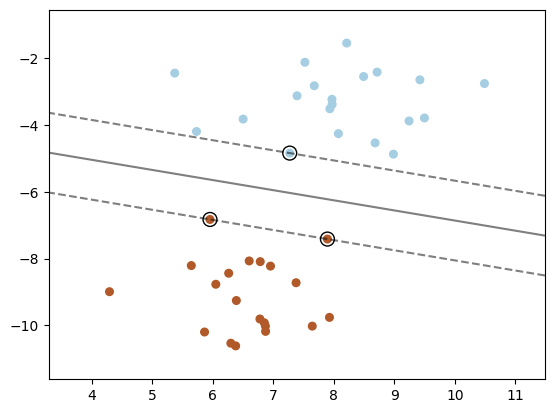

In [ ]:
#SVM

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Referencias

[1]  SUPPORT VECTOR MACHINES FOR CLASSIFICATION OF HYPERSPECTRAL DATA

@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

@inproceedings{sklearn_api,
  author    = {Lars Buitinck and Gilles Louppe and Mathieu Blondel and
               Fabian Pedregosa and Andreas Mueller and Olivier Grisel and
               Vlad Niculae and Peter Prettenhofer and Alexandre Gramfort
               and Jaques Grobler and Robert Layton and Jake VanderPlas and
               Arnaud Joly and Brian Holt and Ga{\"{e}}l Varoquaux},
  title     = {{API} design for machine learning software: experiences from the scikit-learn
               project},
  booktitle = {ECML PKDD Workshop: Languages for Data Mining and Machine Learning},
  year      = {2013},
  pages = {108--122},
}
